# Decision Tree 

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV


NAmes      326
CollgCr    188
OldTown    166
Sawyer     115
Edwards    112
Gilbert    112
Somerst    111
NWAmes      99
NridgHt     95
BrkSide     85
SawyerW     85
Mitchel     84
Crawfor     69
NoRidge     46
IDOTRR      43
Timber      42
StoneBr     38
SWISU       32
MeadowV     30
ClearCr     27
BrDale      21
Blmngtn     18
NPkVill     18
Veenker     15
Greens       7
Name: Neighborhood, dtype: int64
Index(['Unnamed: 0', 'Unnamed: 0.1', 'PID', 'GrLivArea', 'SalePrice',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'MiscVal', 'MoSold',
       'YrSold', 'bathrm_cnt', 'patioSF', 'Prop_Addr', 'Full_Adr', 'gcode',
       'lat', 'long', 'dist', 'zip', 'tract', 'income', 'hood_Blmngtn',


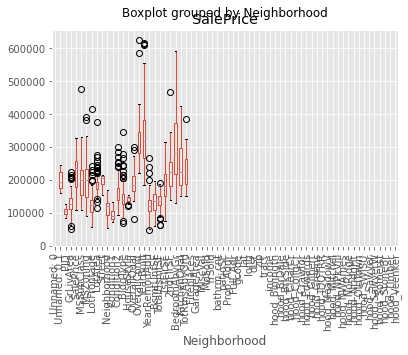

In [2]:
# Importing clean_data module with cleaned dataset
from clean_data import *

In [3]:
# Initializing Decision Tree
tree_reg = DecisionTreeRegressor()
tree = tree_reg.fit(X1, Y)

In [4]:
# Predicting Price/Sqft
Y_pred = tree_reg.predict(X1)

# Printing error and score of overfit decision tree model
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print(RMSE)
R2 = tree_reg.score(X1,Y)
print(R2)

0.0
1.0


In [5]:
# Calculating cross validation scores
scores = cross_validate(tree_reg, X1, Y, cv = 20, scoring = ('r2','neg_mean_squared_error'))
scores

{'fit_time': array([0.05021119, 0.03257895, 0.02536702, 0.02863693, 0.02509689,
        0.02334213, 0.02301002, 0.02286482, 0.02431583, 0.02464175,
        0.02396393, 0.02228594, 0.02698493, 0.02370405, 0.02413583,
        0.02361584, 0.02466607, 0.02320218, 0.02253795, 0.02300024]),
 'score_time': array([0.00577402, 0.00277209, 0.00356579, 0.00281429, 0.00227499,
        0.00230098, 0.00229192, 0.00219488, 0.00241113, 0.0022862 ,
        0.00232172, 0.00206709, 0.00229406, 0.00215602, 0.00228405,
        0.00219393, 0.00228977, 0.00216603, 0.00211501, 0.00221992]),
 'test_r2': array([ 0.33848286,  0.46946788,  0.27949449,  0.48156309,  0.39071182,
         0.50596196,  0.35847503,  0.24019438,  0.37441464,  0.39095334,
         0.34602141,  0.30430427,  0.51520653,  0.35767503,  0.21293899,
        -0.27958508,  0.28900228,  0.39880421,  0.40643873,  0.49204165]),
 'test_neg_mean_squared_error': array([-131.39638843, -127.52107381, -172.53644197, -113.77085388,
        -159.13741714,

In [6]:
np.linspace(start=2, stop=30, num=15, dtype=int)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [7]:
# Gridsearch with cross valiadation

from sklearn.model_selection import GridSearchCV
grid_para_tree = [{
    "min_samples_leaf": range(1,10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_reg.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_reg, grid_para_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

%time grid_search_tree.fit(X1, Y)

CPU times: user 828 ms, sys: 165 ms, total: 993 ms
Wall time: 10.1 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=108), n_jobs=-1,
             param_grid=[{'min_samples_leaf': range(1, 10),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='neg_mean_squared_error')

In [8]:
# RETURNS a DATA FRAME BUT DOES NOT FIT BEST ESTIMATE BACK TO DATA. 
# CANT BE RUN WITH refit = True because there are two scoring methods, and it does not know which one to use.

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = ['r2', 'neg_mean_squared_error'], refit = False, cv = 3, verbose = 3)


tuning_model.fit(X1, Y)

Results = pd.DataFrame(tuning_model.cv_results_)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) 

[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes

[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_sampl

[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_l

[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_l

[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_l

[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_l

[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_l

[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_l

[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-172.124) r2: (test=0.215) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-171.110) r2: (test=0.140) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-190.024) r2: (test=0.194) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-177.688) r2: (test=0.190) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-165.594) r2: (test=0.167) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-199.719) r2: (test=0.152) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_l

[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-167.738) r2: (test=0.288) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-145.143) r2: (test=0.338) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-132.148) r2: (test=0.335) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None,

[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-160.923) r2: (test=0.317) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-143.898) r2: (test=0.344) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-135.812) r2: (test=0.317) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_l

[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-160.923) r2: (test=0.317) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-143.898) r2: (test=0.344) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-135.812) r2: (test=0.317) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_l

[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-160.923) r2: (test=0.317) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-143.898) r2: (test=0.344) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-135.812) r2: (test=0.317) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_l

[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-135.812) r2: (test=0.317) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-160.923) r2: (test=0.317) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-143.898) r2: (test=0.344) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_l

[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-160.923) r2: (test=0.317) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-143.898) r2: (test=0.344) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-135.812) r2: (test=0.317) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_l

[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-164.326) r2: (test=0.303) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-143.898) r2: (test=0.344) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-135.812) r2: (test=0.317) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_l

[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-144.274) r2: (test=0.342) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-134.728) r2: (test=0.322) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-164.326) r2: (test=0.303) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples

[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-162.332) r2: (test=0.311) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-144.274) r2: (test=0.342) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-134.728) r2: (test=0.322) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-144.042) r2: (test=0.389) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-126.673) r2: (test=0.363) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_sample

[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-144.274) r2: (test=0.342) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-134.728) r2: (test=0.322) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-144.042) r2: (test=0.389) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-126.673) r2: (test=0.363) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-162.332) r2: (test=0.311) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_l

[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-141.459) r2: (test=0.400) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-123.154) r2: (test=0.439) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-124.011) r2: (test=0.376) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-162.332) r2: (test=0.311) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-144.274) r2: (test=0.342) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-134.728) r2: (test=0.322) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_l

[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-104.738) r2: (test=0.473) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-145.864) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-123.732) r2: (test=0.436) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-115.931) r2: (test=0.417) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-126.586) r2: (test=0.463) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.823) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None,

[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-119.935) r2: (test=0.397) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-131.945) r2: (test=0.440) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-110.909) r2: (test=0.494) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-111.613) r2: (test=0.439) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-141.184) r2: (test=0.401) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.873) r2: (test=0.372) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_l

[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-101.812) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-99.448) r2: (test=0.500) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-139.753) r2: (test=0.407) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-118.728) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-112.809) r2: (test=0.433) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-123.126) r2: (test=0.478) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_sampl

[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.823) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.752) r2: (test=0.488) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.225) r2: (test=0.418) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-118.529) r2: (test=0.460) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-112.258) r2: (test=0.435) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-126.753) r2: (test=0.462) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_

[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.823) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-104.738) r2: (test=0.473) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-134.130) r2: (test=0.431) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-116.614) r2: (test=0.468) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-111.196) r2: (test=0.441) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-126.586) r2: (test=0.463) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_l

[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-118.244) r2: (test=0.461) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-111.308) r2: (test=0.440) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-118.972) r2: (test=0.495) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.823) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-104.738) r2: (test=0.473) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-134.130) r2: (test=0.431) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_l

[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-118.972) r2: (test=0.495) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-101.453) r2: (test=0.538) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-105.269) r2: (test=0.471) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-132.282) r2: (test=0.439) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-118.244) r2: (test=0.461) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-111.308) r2: (test=0.440) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_l

[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-119.433) r2: (test=0.493) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-101.699) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-106.558) r2: (test=0.464) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-130.172) r2: (test=0.448) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-116.699) r2: (test=0.468) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-111.308) r2: (test=0.440) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_l

[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-130.278) r2: (test=0.447) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-111.288) r2: (test=0.493) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-110.861) r2: (test=0.443) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-119.433) r2: (test=0.493) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-101.699) r2: (test=0.536) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-106.558) r2: (test=0.464) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_l

[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-112.419) r2: (test=0.488) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-107.851) r2: (test=0.458) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-119.823) r2: (test=0.492) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-103.155) r2: (test=0.530) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-103.155) r2: (test=0.481) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-130.278) r2: (test=0.447) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_l

[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-126.244) r2: (test=0.464) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-101.130) r2: (test=0.539) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-108.207) r2: (test=0.456) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-120.444) r2: (test=0.489) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-111.267) r2: (test=0.493) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-104.034) r2: (test=0.477) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None,

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-119.935) r2: (test=0.397) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-131.945) r2: (test=0.440) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-110.909) r2: (test=0.494) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-111.613) r2: (test=0.439) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-137.462) r2: (test=0.417) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-133.444) r2: (test=0.392) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_l

[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-99.885) r2: (test=0.545) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-100.069) r2: (test=0.497) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-125.251) r2: (test=0.469) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-115.780) r2: (test=0.472) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-110.766) r2: (test=0.443) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-119.325) r2: (test=0.494) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_le

[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-96.670) r2: (test=0.559) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-100.873) r2: (test=0.493) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-119.916) r2: (test=0.491) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-118.654) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-105.012) r2: (test=0.472) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-111.698) r2: (test=0.526) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_le

[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-104.590) r2: (test=0.474) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-118.469) r2: (test=0.497) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-118.278) r2: (test=0.461) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-102.458) r2: (test=0.485) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-108.528) r2: (test=0.539) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-104.697) r2: (test=0.523) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_l

[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-106.019) r2: (test=0.517) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-97.219) r2: (test=0.511) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-117.541) r2: (test=0.501) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-112.767) r2: (test=0.486) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-100.016) r2: (test=0.497) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-116.457) r2: (test=0.506) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_le

[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-112.660) r2: (test=0.486) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-100.016) r2: (test=0.497) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-116.457) r2: (test=0.506) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-100.441) r2: (test=0.542) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-95.096) r2: (test=0.522) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-116.641) r2: (test=0.505) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_le

[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-116.457) r2: (test=0.506) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-100.441) r2: (test=0.542) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-95.096) r2: (test=0.522) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-116.641) r2: (test=0.505) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-109.795) r2: (test=0.500) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-109.302) r2: (test=0.450) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_le

[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-109.302) r2: (test=0.450) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-116.091) r2: (test=0.507) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-101.204) r2: (test=0.539) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-95.295) r2: (test=0.521) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-116.531) r2: (test=0.506) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-108.993) r2: (test=0.503) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_sampl

[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-95.295) r2: (test=0.521) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-116.531) r2: (test=0.506) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-108.993) r2: (test=0.503) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.575) r2: (test=0.459) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-125.751) r2: (test=0.466) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-118.677) r2: (test=0.459) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_

[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-100.390) r2: (test=0.542) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-95.208) r2: (test=0.521) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-125.490) r2: (test=0.467) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-110.389) r2: (test=0.497) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.304) r2: (test=0.470) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-131.945) r2: (test=0.440) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10,

[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-131.945) r2: (test=0.440) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-110.909) r2: (test=0.494) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-111.613) r2: (test=0.439) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.462) r2: (test=0.417) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-133.444) r2: (test=0.392) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-119.935) r2: (test=0.397) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_l

[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-104.139) r2: (test=0.525) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-100.108) r2: (test=0.497) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-120.590) r2: (test=0.488) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.947) r2: (test=0.490) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-113.043) r2: (test=0.432) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.413) r2: (test=0.519) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samp

[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-106.818) r2: (test=0.513) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.144) r2: (test=0.461) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-112.770) r2: (test=0.521) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.016) r2: (test=0.485) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-95.594) r2: (test=0.519) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-124.335) r2: (test=0.472) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_

[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-114.729) r2: (test=0.513) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-110.571) r2: (test=0.496) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-94.769) r2: (test=0.523) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-124.481) r2: (test=0.472) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-111.838) r2: (test=0.490) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-105.227) r2: (test=0.471) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_le

[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.092) r2: (test=0.520) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.652) r2: (test=0.482) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-92.036) r2: (test=0.537) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-127.130) r2: (test=0.461) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-111.869) r2: (test=0.490) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.446) r2: (test=0.460) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_le

[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.476) r2: (test=0.470) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-112.121) r2: (test=0.524) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-116.918) r2: (test=0.467) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-95.181) r2: (test=0.521) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-132.489) r2: (test=0.438) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-114.646) r2: (test=0.477) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_l

[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.282) r2: (test=0.545) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-109.042) r2: (test=0.503) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.476) r2: (test=0.470) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-114.309) r2: (test=0.515) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-116.612) r2: (test=0.468) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-97.912) r2: (test=0.508) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples

[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-95.208) r2: (test=0.521) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.282) r2: (test=0.545) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-109.063) r2: (test=0.503) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.476) r2: (test=0.470) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-119.242) r2: (test=0.494) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-118.408) r2: (test=0.460) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_sample

[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-100.535) r2: (test=0.542) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-95.208) r2: (test=0.521) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.282) r2: (test=0.545) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-109.063) r2: (test=0.503) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.476) r2: (test=0.470) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-137.379) r2: (test=0.417) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min

[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-91.438) r2: (test=0.540) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-109.917) r2: (test=0.534) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-105.725) r2: (test=0.518) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-101.564) r2: (test=0.489) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-118.148) r2: (test=0.499) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-98.435) r2: (test=0.551) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_node

[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-133.444) r2: (test=0.392) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-119.935) r2: (test=0.397) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-119.325) r2: (test=0.494) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-104.051) r2: (test=0.526) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-103.116) r2: (test=0.481) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-126.935) r2: (test=0.461) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_

[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-99.584) r2: (test=0.499) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-124.559) r2: (test=0.471) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-104.308) r2: (test=0.525) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-103.890) r2: (test=0.478) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-113.413) r2: (test=0.519) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-105.805) r2: (test=0.518) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_sam

[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-112.101) r2: (test=0.489) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-104.066) r2: (test=0.477) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-115.790) r2: (test=0.509) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-107.267) r2: (test=0.511) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-95.519) r2: (test=0.520) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-114.825) r2: (test=0.513) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_sam

[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.775) r2: (test=0.458) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-114.751) r2: (test=0.513) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-102.630) r2: (test=0.532) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-96.232) r2: (test=0.516) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-114.907) r2: (test=0.512) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-100.768) r2: (test=0.541) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_sam

[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-111.159) r2: (test=0.493) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.371) r2: (test=0.460) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-114.591) r2: (test=0.514) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-105.186) r2: (test=0.521) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-91.755) r2: (test=0.539) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-116.291) r2: (test=0.507) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_sam

[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-115.727) r2: (test=0.472) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-95.013) r2: (test=0.522) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-109.795) r2: (test=0.534) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-112.844) r2: (test=0.486) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.785) r2: (test=0.458) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-112.424) r2: (test=0.523) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_sam

[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-92.841) r2: (test=0.533) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-102.037) r2: (test=0.567) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-103.814) r2: (test=0.527) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-100.544) r2: (test=0.494) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-114.587) r2: (test=0.514) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-116.214) r2: (test=0.470) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min

[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-95.812) r2: (test=0.518) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-117.170) r2: (test=0.503) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-98.330) r2: (test=0.552) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-93.954) r2: (test=0.528) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-102.971) r2: (test=0.563) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-104.920) r2: (test=0.522) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_

[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-118.339) r2: (test=0.498) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-96.209) r2: (test=0.561) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-92.851) r2: (test=0.533) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-104.619) r2: (test=0.556) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-92.118) r2: (test=0.580) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-96.043) r2: (test=0.517) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_sample

[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.095) r2: (test=0.539) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-94.669) r2: (test=0.524) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-106.850) r2: (test=0.547) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-97.861) r2: (test=0.554) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-104.049) r2: (test=0.477) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-118.634) r2: (test=0.497) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=

[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-110.909) r2: (test=0.494) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-111.613) r2: (test=0.439) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.462) r2: (test=0.417) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-133.444) r2: (test=0.392) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-119.935) r2: (test=0.397) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-131.945) r2: (test=0.440) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_s

[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-104.139) r2: (test=0.525) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-100.108) r2: (test=0.497) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-120.590) r2: (test=0.488) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.947) r2: (test=0.490) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-113.043) r2: (test=0.432) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.413) r2: (test=0.519) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, m

[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-91.703) r2: (test=0.539) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.690) r2: (test=0.526) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.211) r2: (test=0.511) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.349) r2: (test=0.470) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-112.770) r2: (test=0.521) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.016) r2: (test=0.485) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min

[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-98.285) r2: (test=0.506) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-116.474) r2: (test=0.506) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-99.566) r2: (test=0.546) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-93.415) r2: (test=0.530) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.335) r2: (test=0.528) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-106.737) r2: (test=0.513) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_

[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-99.661) r2: (test=0.499) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-118.038) r2: (test=0.499) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-96.144) r2: (test=0.562) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-90.017) r2: (test=0.547) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-108.478) r2: (test=0.540) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-98.543) r2: (test=0.551) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_sample

[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.289) r2: (test=0.538) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-90.723) r2: (test=0.544) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-111.469) r2: (test=0.527) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-97.939) r2: (test=0.554) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-97.274) r2: (test=0.511) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-118.277) r2: (test=0.498) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_sampl

[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-106.834) r2: (test=0.547) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-95.148) r2: (test=0.566) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-101.704) r2: (test=0.489) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-108.088) r2: (test=0.541) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-104.644) r2: (test=0.523) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-97.038) r2: (test=0.512) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samp

[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-107.596) r2: (test=0.459) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-105.257) r2: (test=0.553) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-106.451) r2: (test=0.515) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-101.279) r2: (test=0.491) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-106.238) r2: (test=0.549) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-96.083) r2: (test=0.562) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_sam

[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-100.235) r2: (test=0.496) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-104.735) r2: (test=0.556) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-100.032) r2: (test=0.544) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-94.516) r2: (test=0.525) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-108.873) r2: (test=0.538) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-96.712) r2: (test=0.559) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samp

In [9]:
# Printing grid search cross validation scores with associated parameters
Results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_splitter,params,split0_test_r2,...,split2_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
0,0.012237,0.003131,0.005978,0.002083,1,None,1,best,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.193636,...,0.167273,0.183646,0.011671,1201,-190.023973,-177.687802,-165.593548,-177.768441,9.973842,1201
1,0.007862,0.000161,0.005118,0.001207,1,None,1,random,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.152494,...,0.139533,0.169140,0.033130,1301,-199.719208,-172.124037,-171.109697,-180.984314,13.254041,1301
2,0.007835,0.001494,0.003299,0.000279,1,None,2,best,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.193636,...,0.167273,0.183646,0.011671,1201,-190.023973,-177.687802,-165.593548,-177.768441,9.973842,1201
3,0.006517,0.002060,0.002936,0.000224,1,None,2,random,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.152494,...,0.139533,0.169140,0.033130,1301,-199.719208,-172.124037,-171.109697,-180.984314,13.254041,1301
4,0.007880,0.001616,0.004797,0.002718,1,None,3,best,"{'max_depth': 1, 'max_leaf_nodes': None, 'min_...",0.193636,...,0.167273,0.183646,0.011671,1201,-190.023973,-177.687802,-165.593548,-177.768441,9.973842,1201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,0.007505,0.000531,0.002433,0.000081,12,90,8,random,"{'max_depth': 12, 'max_leaf_nodes': 90, 'min_s...",0.537808,...,0.513459,0.534796,0.016331,46,-108.917989,-98.034393,-96.752010,-101.234798,5.458004,40
1396,0.014289,0.000827,0.002879,0.000200,12,90,9,best,"{'max_depth': 12, 'max_leaf_nodes': 90, 'min_s...",0.495910,...,0.529156,0.528360,0.026176,110,-118.791397,-96.522567,-93.630544,-102.981503,11.241457,123
1397,0.007604,0.000419,0.002546,0.000167,12,90,9,random,"{'max_depth': 12, 'max_leaf_nodes': 90, 'min_s...",0.555589,...,0.503825,0.549087,0.034608,5,-104.727739,-90.416369,-98.667738,-97.937282,5.865379,3
1398,0.014951,0.000989,0.002980,0.000271,12,90,10,best,"{'max_depth': 12, 'max_leaf_nodes': 90, 'min_s...",0.503895,...,0.525427,0.527000,0.019540,126,-116.909799,-98.350619,-94.372164,-103.210861,9.821837,149


In [10]:
# Sorting by best r-squared
Results[['mean_test_r2','rank_test_r2']].sort_values(by = 'rank_test_r2')

,mean_test_r2,rank_test_r2
1197,0.551055,1
1177,0.550930,2
1189,0.550016,3
1157,0.549725,4
1397,0.549087,5
...,...,...
87,0.169140,1301
151,0.169140,1301
89,0.169140,1301
149,0.169140,1301


In [11]:
# Sorting by best r-squared with errors
rr = Results[['mean_test_r2','rank_test_r2',
        'mean_test_neg_mean_squared_error',
        'std_test_neg_mean_squared_error',
        'rank_test_neg_mean_squared_error']].sort_values(by = 'rank_test_neg_mean_squared_error')
rr['mean_test_neg_mean_squared_error'] = np.sqrt(-rr['mean_test_neg_mean_squared_error'])

rr

,mean_test_r2,rank_test_r2,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
1197,0.551055,1,9.878940,5.219846,1
1177,0.550930,2,9.880733,5.138201,2
1397,0.549087,5,9.896327,5.865379,3
1157,0.549725,4,9.896440,5.644770,4
1189,0.550016,3,9.900940,6.772245,5
...,...,...,...,...,...
161,0.169140,1301,13.453041,13.254041,1301
73,0.169140,1301,13.453041,13.254041,1301
139,0.169140,1301,13.453041,13.254041,1301
63,0.169140,1301,13.453041,13.254041,1301


In [12]:
# Checking results columns
Results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf',
       'param_splitter', 'params', 'split0_test_r2', 'split1_test_r2',
       'split2_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2',
       'split0_test_neg_mean_squared_error',
       'split1_test_neg_mean_squared_error',
       'split2_test_neg_mean_squared_error',
       'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error',
       'rank_test_neg_mean_squared_error'],
      dtype='object')

In [13]:
# DOES NOT REFIT BEST ESTIMATOR TO DATA, SO ATTRIBUTES ARE NOT AVAILABLE

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tm = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = ['neg_mean_squared_error'], refit = False, cv = 3, verbose = 3)


tm.fit(X1, Y)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; n

[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_de

[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_dept

[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_dep

[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_dept

[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_dept

[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-165.594) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-199.719) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-172.124) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-171.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-190.024) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-177.688) total time=   0.0s
[CV 3/3] END max_de

[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-145.478) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-132.148) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-144.042) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-126.673) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-167.738) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-145.478) total time=   0.0s


[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-144.042) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-126.673) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-162.332) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-144.274) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-134.728) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END ma

[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-144.274) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-134.728) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-164.326) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_

[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-134.728) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-164.326) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-135.812) total time=   0.0s
[CV 1/3] END max_d

[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-164.326) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-135.812) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-160.923) total time=   0.0s
[CV 2/3] END max_de

[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-135.812) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-160.923) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-160.923) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-135.812) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_dept

[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-135.812) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-160.923) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-123.154) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-124.011) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-160.923) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-143.898) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-135.812) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-141.459) total time=   0.0s
[CV 2/3] END max_dept

[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-120.592) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-102.927) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-103.787) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-145.089) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-131.545) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-122.210) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-121.613) total time=   0.0s
[CV 2/3

[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-142.035) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-137.873) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-119.935) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-131.945) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-110.909) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-111.613) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-142.035) total time=   0.0s
[CV 2/3] END max_de

[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-103.234) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-132.231) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-119.328) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-111.526) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-118.696) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-99.449) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-103.234) total time=   0.0s
[CV 1/3] END max_depth

[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.823) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.752) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.225) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-118.529) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-112.258) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-126.753) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-104.564) total time=   0.0s
[CV 3/3] END max_de

[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-123.137) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-105.543) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-104.195) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-143.035) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-121.175) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.992) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-121.281) total time=   0.0s
[CV 2/3] END max_dept

[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-107.749) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-120.592) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-103.534) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-103.787) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-137.228) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-113.409) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-109.613) total time=   0.0s
[CV 1/3] END max_de

[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-132.774) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-112.419) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-107.851) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-119.823) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-103.155) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-103.155) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-130.278) total time=   0.0s
[CV 2/3] END max_de

[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-106.558) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-130.172) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-116.699) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-111.308) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-118.972) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-101.453) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-105.269) total time=   0.0s
[CV 1/3] END max_dept

[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.823) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-104.738) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-134.130) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-116.614) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-111.196) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-126.586) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.823) total time=   0.0s
[CV 3/3] END max_dept

[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-116.457) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-100.441) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-95.096) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-113.292) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-110.340) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-98.051) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-116.091) total time=   0.0s
[CV 2/3]

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-111.613) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-139.522) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-133.444) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-119.935) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-119.325) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-104.051) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-103.116) total time=   0.0s
[CV 1/3] END max_

[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-99.967) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-127.853) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-111.289) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-104.847) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-115.460) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-108.054) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-99.893) total time=   0.0s
[CV 1/3] END max_depth=

[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-113.158) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-107.307) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-97.519) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-122.378) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-118.372) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-106.111) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-111.369) total time=   0.0s
[CV 2/3] END max_depth

[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-123.507) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-120.482) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-104.866) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-115.310) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-109.444) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-105.299) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-120.653) total time=   0.0s
[CV 2/3] END max_de

[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-109.788) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-104.216) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-120.121) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-111.388) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-107.860) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-118.963) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-109.711) total time=   0.0s
[CV 3/3] END max_dept

[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-107.765) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-120.250) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-110.398) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-104.536) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-124.281) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-116.670) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-107.648) total time=   0.0s
[CV 1/3] END max_de

[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-104.536) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-124.281) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-116.840) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-107.648) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-116.336) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-103.095) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-102.818) total time=   0.0s
[CV 1/3] END max_dept

[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-103.095) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-102.818) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-117.416) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-108.312) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-101.862) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-111.981) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-100.354) total time=   0.0s
[CV 3/3] END max_dept

[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-100.126) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-114.390) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-98.836) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-90.279) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-111.907) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-96.158) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-108.285) total time=   0.0s
[CV 1/3] E

[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-131.945) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-110.909) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-111.613) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-137.462) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-133.444) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-119.935) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-131.945) total time=   0.0s
[CV 2/3] END max_dept

[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-121.908) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-99.885) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.457) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-126.096) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-111.003) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-113.043) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-121.908) total time=   0.0s
[CV 2/3] END max_dept

[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-101.784) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-91.853) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-117.708) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-100.057) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-103.750) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-116.613) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-101.846) total time=   0.0s
[CV 3/3] END max_dep

[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-119.317) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-97.829) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-90.573) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-113.510) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-95.967) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-99.439) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-116.474) total time=   0.0s
[CV 2/3] END max_depth=9

[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.092) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.652) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-92.036) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-127.130) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-111.869) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.446) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-112.373) total time=   0.0s
[CV 2/3] END max_depth

[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-109.350) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-104.876) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-113.782) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-104.710) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-99.841) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-114.145) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-103.358) total time=   0.0s
[CV 3/3] END max_dep

[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-108.537) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-101.473) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-114.691) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-99.786) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-99.819) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-104.986) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-105.303) total time=   0.0s
[CV 3/3] END max_dept

[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-105.688) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-110.499) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-97.102) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-106.782) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-108.248) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-104.923) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-103.571) total time=   0.0s
[CV 1/3] END max_dep

[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.557) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-94.230) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-114.857) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-103.917) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-92.256) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-119.047) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-98.200) total time=   0.0s
[CV

[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.462) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-133.444) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-119.935) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-131.945) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-110.909) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-111.613) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-139.522) total time=   0.0s
[CV 2/3]

[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-120.590) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.947) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-113.043) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.413) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-106.937) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-99.584) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-124.559) total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-112.770) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.016) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-95.594) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-118.758) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-112.101) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-104.066) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-115.790) total time=   0.0s
[CV 2/3] END ma

[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-115.118) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-110.571) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-96.306) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-114.134) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-111.968) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-107.775) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-114.751) total time=   0.0s
[CV 2/3] END ma

[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-106.942) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-114.533) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-107.239) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-97.137) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-115.738) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-106.854) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-105.626) total time=   0.0s
[CV 1/3] END 

[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-112.542) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-104.414) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-100.298) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-113.802) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-100.192) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-96.373) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-111.923) total time=   0.0s
[CV 2/3] END 

[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-96.540) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-108.131) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-104.916) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-107.484) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-102.953) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-106.778) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-96.083) total time=   0.0s
[CV 3/3] END max

[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-95.912) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-104.517) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-105.146) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-104.712) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-99.797) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-110.737) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-101.631) total time=   0.0s
[CV 3/3] END max

[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-94.669) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-106.850) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-97.861) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-104.049) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-118.634) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-98.174) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-91.890) total time=   0.0s
[CV 

[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-137.462) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-133.444) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-119.935) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-131.945) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-110.909) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-111.613) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-139.522) total time=   0.0s
[CV 2/3]

[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-100.108) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-120.590) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.947) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-113.043) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.413) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-106.937) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-99.584) total time=   0.0s
[CV 1/3] EN

[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.690) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-107.211) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.349) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-112.770) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-113.016) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-95.594) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-118.758) total time=   0.0s
[CV 2/3] E

[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-111.335) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-106.737) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-103.649) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-115.118) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-110.571) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-96.306) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-115.291) total time=   0.0s
[CV 2/3] E

[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-90.459) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-105.949) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-104.186) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-100.872) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-114.470) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-112.149) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-94.154) total time=   0.0s
[CV 1/3] END

[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-108.194) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-93.272) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-115.816) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-105.971) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-106.080) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-114.477) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-104.116) total time=   0.0s
[CV 3/3] END ma

[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-106.005) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-117.989) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-110.470) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-98.807) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-110.236) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-100.961) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-100.031) total time=   0.0s
[CV 1/3] END 

[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-100.784) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-100.235) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-104.735) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-100.032) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-94.516) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-108.873) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-96.712) total time=   0.0s
[CV 3/3] END max

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=108),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             refit=False, scoring=['neg_mean_squared_error'], verbose=3)

In [14]:
tm.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [16]:
# Working grid search and cross validation
# This works

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tmtm = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = 'neg_mean_squared_error', cv = 3, verbose = 3, 
                    return_train_score = True)


tmtm.fit(X1, Y)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/3] END max_dep

[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; total time=   0.0

[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; total time=  

[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best; total time=   0.0s
[C

[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; total time=   

[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random; total time=   0.0

[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=10, splitter=best; total time=   0.0

[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=bes

[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; total time=   0.0s
[C

[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; total time=   0.0s


[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=9, splitter=best; total time=   0.0s
[C

[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; total time=   0.0

[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=9, splitter=best; total time=   0.0

[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; total time=   0.0

[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best;

[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=2, splitter=random; total time=   0.0

[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; total time=   0.0s


[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; total time=   0.0

[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=6, splitter=random; total time=   0.0

[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; total time=   0

[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; total time=   0.0s


[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=10, splitter=bes

[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; total time=   0.0s


[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; total time=   0.0s
[C

[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; total time=   0.0

[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[C

[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s


[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0

[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; total time=   0.0s


[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=7, splitter=random; total time=   0.0s


[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; total time=   

[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=7, splitter=best; total time=   0.0s


[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; total time=

[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s


[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; total time=   0.0s


[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total t

[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; total t

[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=2, splitter=best; total time

[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=6, splitter=random; total t

[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; t

[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; total t

[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; total t

[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=4, splitter=best; total tim

[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=9, splitter=random; total t

[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=3, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=3, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; total t

[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=7, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; total t

[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; total t

[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=5, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; total tim

[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; tota

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=108),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [17]:
# Finding best estimator
tmtm.best_estimator_

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=90, min_samples_leaf=9,
                      random_state=108, splitter='random')

In [18]:
# Finding best estimator score
tmtm.best_estimator_.score(X1,Y)

0.6364536172282843

In [19]:
# Checking columns for Results DF
Results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf',
       'param_splitter', 'params', 'split0_test_r2', 'split1_test_r2',
       'split2_test_r2', 'mean_test_r2', 'std_test_r2', 'rank_test_r2',
       'split0_test_neg_mean_squared_error',
       'split1_test_neg_mean_squared_error',
       'split2_test_neg_mean_squared_error',
       'mean_test_neg_mean_squared_error', 'std_test_neg_mean_squared_error',
       'rank_test_neg_mean_squared_error'],
      dtype='object')

In [20]:
# Calculating RMSE
mse = tmtm.best_score_
rmse = np.sqrt(-mse)
rmse

9.878939756582028

In [21]:
# Finding most important variables for best model

tmtm.best_params_
feature_list = list(X1.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(tmtm.best_estimator_.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: income               Importance: 0.28256
Variable: YearRemodAdd         Importance: 0.15848
Variable: OverallQual          Importance: 0.0836
Variable: TotalBsmtSF          Importance: 0.07433
Variable: Bsmt_ratio           Importance: 0.06797
Variable: bsmt_above_ratio     Importance: 0.05464
Variable: BldgType_Duplex      Importance: 0.04078
Variable: MSZoning_RM          Importance: 0.03667
Variable: OverallCond          Importance: 0.02922
Variable: MSZoning_RL          Importance: 0.0284
Variable: KitchenQual          Importance: 0.0273
Variable: HouseStyle_SFoyer    Importance: 0.01516
Variable: hood_CollgCr         Importance: 0.01238
Variable: bathrm_cnt           Importance: 0.01202
Variable: HouseStyle_2Story    Importance: 0.00965
Variable: LotArea              Importance: 0.0094
Variable: hood_Crawfor         Importance: 0.00753
Variable: HouseStyle_1.5Fin    Importance: 0.00699
Variable: HouseStyle_SLvl      Importance: 0.006
Variable: hood_Timber          Import

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [29]:
# Creating feature importance DF
feat_imp = pd.DataFrame()

feat_imp['Feature'] = X1.columns
feat_imp['Importance'] = tmtm.best_estimator_.feature_importances_
feat_imp = feat_imp.sort_values(by = 'Importance', ascending = False)
feat_imp

,Feature,Importance
12,income,0.282559
4,YearRemodAdd,0.158483
2,OverallQual,0.083603
53,TotalBsmtSF,0.074327
51,Bsmt_ratio,0.067971
54,bsmt_above_ratio,0.054644
44,BldgType_Duplex,0.040778
39,MSZoning_RM,0.036669
3,OverallCond,0.029217
38,MSZoning_RL,0.028401


In [30]:
# Top 10
feat_imp[0:10]

,Feature,Importance
12,income,0.282559
4,YearRemodAdd,0.158483
2,OverallQual,0.083603
53,TotalBsmtSF,0.074327
51,Bsmt_ratio,0.067971
54,bsmt_above_ratio,0.054644
44,BldgType_Duplex,0.040778
39,MSZoning_RM,0.036669
3,OverallCond,0.029217
38,MSZoning_RL,0.028401


In [31]:
# No Importance
feat_imp[feat_imp['Importance'] == 0]

,Feature,Importance
20,hood_Gilbert,0.0
8,MiscVal,0.0
52,Bedr_ratio,0.0
10,patioSF,0.0
14,hood_BrDale,0.0
15,hood_BrkSide,0.0
46,BldgType_TwnhsE,0.0
45,BldgType_Twnhs,0.0
16,hood_ClearCr,0.0
43,BldgType_2fmCon,0.0


In [32]:
# Any importance
feat_imp[feat_imp['Importance'] != 0]

,Feature,Importance
12,income,0.282559
4,YearRemodAdd,0.158483
2,OverallQual,0.083603
53,TotalBsmtSF,0.074327
51,Bsmt_ratio,0.067971
54,bsmt_above_ratio,0.054644
44,BldgType_Duplex,0.040778
39,MSZoning_RM,0.036669
3,OverallCond,0.029217
38,MSZoning_RL,0.028401


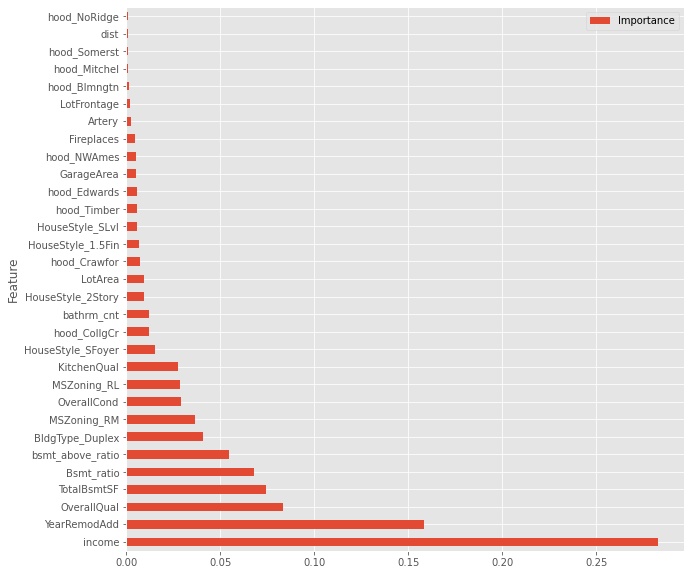

In [36]:
# Plotting all features with any importance
fig = feat_imp[feat_imp['Importance'] != 0].plot.barh(x = 'Feature', y = 'Importance', figsize = (10,10))

<AxesSubplot:ylabel='Feature'>

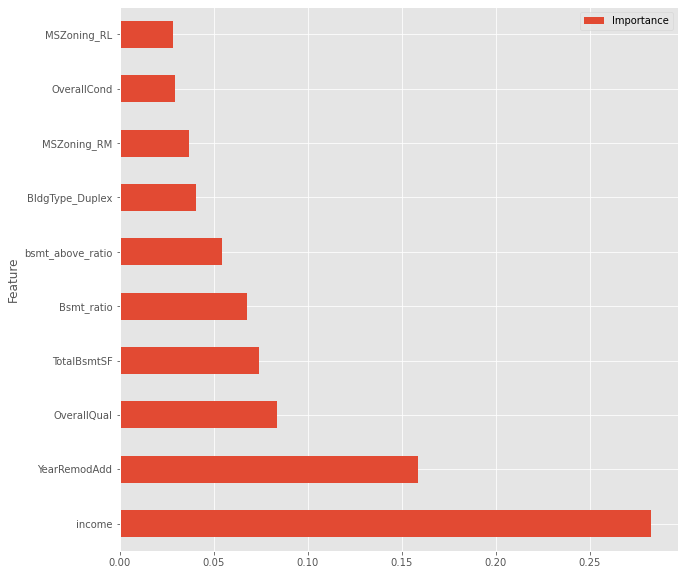

In [38]:
# Plotting top 10 features by importance
feat_imp[0:10].plot.barh(x = 'Feature', y = 'Importance', figsize = (10,10))